In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
iris = load_iris()
print(type(iris))
print('================data shape===============')
print('Data', iris.data.shape)
print('Label', iris.target.shape)
print('First five data :', iris.data[0:5])
print('First five label :', iris.target[0:5])
print('iris dataset keys\n', iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
================data shape===============
Data (150, 4)
Label (150,)
First five data : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First five label : [0 0 0 0 0]
iris dataset keys
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pandas as pd

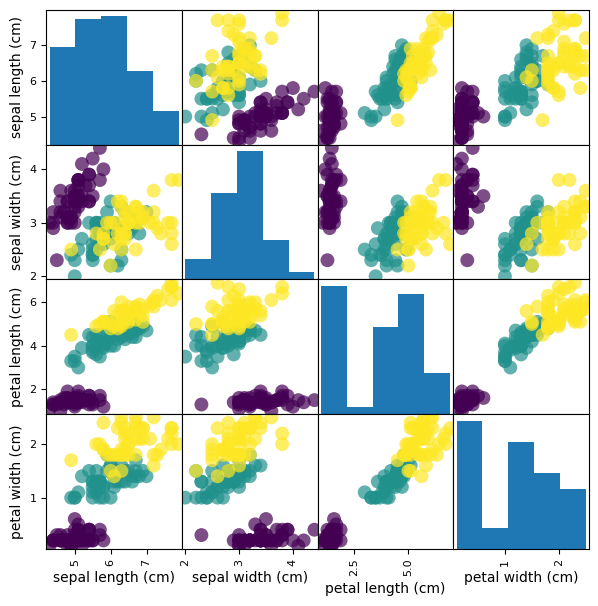

In [ ]:
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=iris.target,
                           figsize=(7, 7),
                           marker='o',
                           hist_kwds={'bins':5},
                           s=100, alpha=0.7)
plt.show()

In [ ]:
x = iris.data
y = iris.target.reshape(-1, 1)
print(y[0:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[50:55])

(150, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, encoded_y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               1280      
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 512)               66048     
                                                                 
 dense_23 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________


#경사하강알고리즘
http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html

In [ ]:
opt = Adam(lr=0.001)
model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
fit_hist = model.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=1)

Epoch 1/50
24/24 [==============================] - 1s 2ms/step - loss: 0.7371 - accuracy: 0.7250
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.9167
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.8917
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.8667
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.9417
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9583
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9083
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9583
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9583
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9000
Epoch 11/50
24/24 [

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 0.9666666388511658


In [ ]:
score

[0.12019725888967514, 0.9666666388511658]

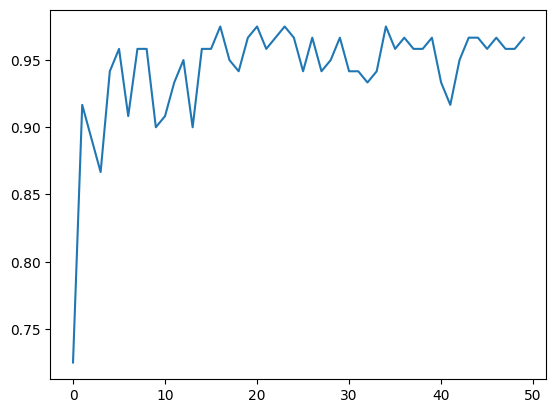

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [ ]:
labels = iris.target_names
my_sample = np.random.randint(30)
sample = X_test[my_sample]
print(sample)
sample = sample.reshape(1,4)
print(sample)
pred = model.predict(sample)
print('pred is',pred)
print('actual is :', Y_test[my_sample])
print('Target :', labels[np.argmax(Y_test[my_sample])])
print('Prediction after learning is :', labels[np.argmax(pred)])

[4.9 2.5 4.5 1.7]
[[4.9 2.5 4.5 1.7]]
1/1 [==============================] - 0s 15ms/step
pred is [[1.6126342e-04 5.2915011e-02 9.4692373e-01]]
actual is : [0. 0. 1.]
Target : virginica
Prediction after learning is : virginica
